In [8]:
!pip install numpy

In [10]:

import numpy as np

In [12]:
y_predicted = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [20]:
def mae(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += abs(yp - yt)
    print("Total error is:",total_error)
    mae = total_error/len(y_true)
    print("Mean absolute error is:",mae)
    return mae

 mae = total_error/len(y_true) we use y-true cuz  measuing error against truth

In [22]:
mae(y_predicted, y_true)


Total error is: 2.5
Mean absolute error is: 0.5


0.5

Implement same thing using numpy in much easier way

In [63]:
#whole function  this short line
np.sum(np.abs(y_predicted-y_true))

2.5

In [65]:
np.mean(np.abs(y_predicted-y_true))

0.5

In [47]:
def mae(y_predicted,y_true):
    return np.mean(np.abs(y_predicted-y_true))

In [51]:
mae(y_predicted,y_true)

0.5

lets implement LogLoss Or Binary Crossentropy




#log[0]  & Log[1] are problem 
##log(0)→−∞ causes crash or NAN undefined gradient
###log[1]=0 contibutes to no penalty=no gradient


In [67]:
np.log[0]

TypeError: 'numpy.ufunc' object is not subscriptable

In [89]:
#1e-15=0.0000000000001
epsilon=1e-15


1e-15

In [75]:
np.log([1e-15])

array([-34.53877639])

In [83]:
#using list comphresion=>loop into single expression
#convert 0s to 0.0000000000001
y_predicted_new=[max(i,epsilon) for i in y_predicted]
y_predicted_new

[1, 1, 1e-15, 1e-15, 1]

In [95]:
#now convet 1s close to 0.99999999
y_predicted_new=[min(i,1-epsilon) for i in  y_predicted_new]
y_predicted_new


[0.999999999999999, 0.999999999999999, 1e-15, 1e-15, 0.999999999999999]

In [97]:
#convert Python list to a NumPy array.
y_predicted_new=np.array(y_predicted_new)
y_predicted_new

array([1.e+00, 1.e+00, 1.e-15, 1.e-15, 1.e+00])

In [99]:
np.log(y_predicted_new)

array([-9.99200722e-16, -9.99200722e-16, -3.45387764e+01, -3.45387764e+01,
       -9.99200722e-16])

In [107]:
-np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

17.2696280766844

In [214]:
#using function
import math
epsilon=1e-15
def logloss(y_predicted,y_true):
    total_error=0
    for yp,yt in zip(y_predicted,y_true):
     # Clip prediction to avoid log(0)
        yp=max(epsilon,min(yp,1-epsilon))
        total_error+=yt*math.log(yp)+(1-yt)*math.log(1-yp)
    logloss=-total_error/len(y_true)
    return logloss

In [216]:
logloss(y_predicted,y_true)

17.2696280766844

Implement mean squared error (or MSE) in two ways,
1.Without using numpy (i.e. using plain python)

2.With the use of numpy

In [149]:
def mse(y_predicted, y_true):
    total_error=0
    for yp,yt in zip (y_predicted,y_true):
        total_error+=(yp-yt)**2
    print("Total error is:",total_error)
    mse=total_error/len(y_true)
    print("Mean Square Error is:",mse)
    return mse


In [153]:
mse(y_predicted,y_true)

Total error is: 1.83
Mean Square Error is: 0.366


0.366

using Numpy


In [160]:
np.mean(np.square(y_predicted-y_true))

0.366

In [218]:
from sklearn.linear_model import SGDRegressor
import numpy as np

# Input data (x) and target output (y)
x = np.array([[1], [2], [3], [4], [5]])
y = np.array([3, 5, 7, 9, 11])  # This follows y = 2x + 1

# Create a linear model (weights are initialized internally)
model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)

# Train the model
model.fit(x, y)

# Print learned weight and bias
print("Weight (m):", model.coef_[0])
print("Bias (c):", model.intercept_[0])


Weight (m): 2.0990017348068473
Bias (c): 0.627668538356443


Imagine a 3D surface where:

X-axis = weight

Y-axis = bias

Z-axis = MSE

Gradient descent is like rolling a ball downhill on this surface. The ball stops when both partial derivatives are zero—i.e., the slope is flat in all directions.

In [292]:
import numpy as np

# Sample data
X = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])  # y = 2x + 1

# Initialize parameters
w, b = 0.0, 0.0
lr = 0.01

# Gradient descent loop
for _ in range(1000):
    y_pred = w * X + b
    error = y - y_pred
    dw = -2 * np.sum(X * error) / len(X)#w.r.t to weights 
    db = -2 * np.sum(error) / len(X)#w.r.t bias
    w -= lr * dw
    b -= lr * db

print(f"Optimal weight: {w:.4f}, Optimal bias: {b:.4f}")
#the global minimum for this dataset.


Optimal weight: 2.0049, Optimal bias: 0.9857


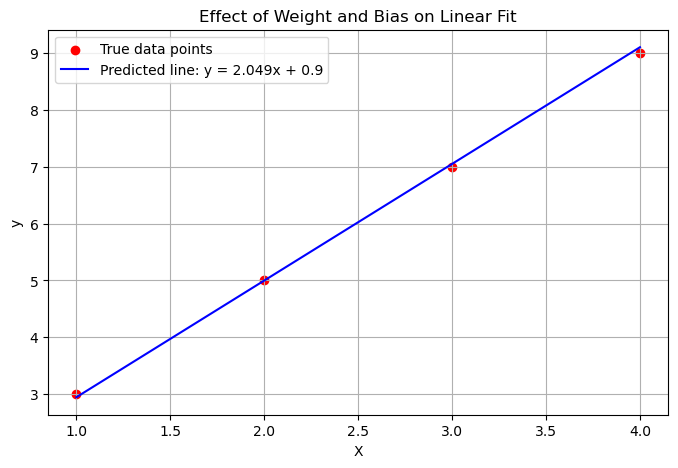

In [294]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
X = np.array([1, 2, 3, 4])
y = np.array([3, 5, 7, 9])  # True relationship: y = 2x + 1

# Adjustable parameters
w = 2.049 # Try values like 1.5, 2.0, 3.0
b = 0.9 # Try values like 0.0, 1.0, -2.0

# Predicted line
y_pred = w * X + b

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='red', label='True data points')
plt.plot(X, y_pred, color='blue', label=f'Predicted line: y = {w}x + {b}')
plt.title('Effect of Weight and Bias on Linear Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [260]:
import numpy as np

# Sample data: y = 2x + 1
X = np.array([1, 2, 3, 4])#y_predicted
y = np.array([3, 5, 7, 9])#is the ideal output for comparing with error y_true

# Adjustable parameters (you can tweak these)
w = 2.049 #if g+ve=w+ + loss+ else g-ve=++w --loss
b = 0.9  #same as w  

# Prediction
y_pred = w * X + b

# Error
error = y - y_pred

# Gradient w.r.t. weight
dw = -2 * np.sum(X * error) / len(X)

# Gradient w.r.t. bias
db = -2 * np.sum(error) / len(X)

# Print results
print(f"Predicted values: {y_pred}")
print(f"Error: {error}")
print(f"Gradient w.r.t. weight (dw): {dw:.4f}")
print(f"Gradient w.r.t. bias (db): {db:.4f}")


Predicted values: [2.949 4.998 7.047 9.096]
Error: [ 0.051  0.002 -0.047 -0.096]
Gradient w.r.t. weight (dw): 0.2350
Gradient w.r.t. bias (db): 0.0450
